<a href="https://colab.research.google.com/github/rafaelbuzi/caged/blob/main/litoral_norte_CAGED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tratando os dados do CAGED**

O Cadastro Geral de Empregados e Desempregados (CAGED) foi criado como registro permanente de admissões e dispensa de empregados, sob o regime da Consolidação das Leis do Trabalho (CLT). É utilizado pelo Programa de Seguro-Desemprego, para conferir os dados referentes aos vínculos trabalhistas, além de outros programas sociais.

Os dados referente ao CAGED podem ser obtidos no link abaixo:

http://pdet.mte.gov.br/novo-caged

## **0. Import das Bibliotecas e carregamento dos dados**

In [1]:
import pandas as pd
import numpy as np
df = pd.read_excel('3-tabelas (2).xlsx', "Tabela 8.1")

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


Visão do `Planilha Tabela 8.1` no *Excel*. Podemos identificar que há muitas células mescladas e os dados estão em um formato colunar.

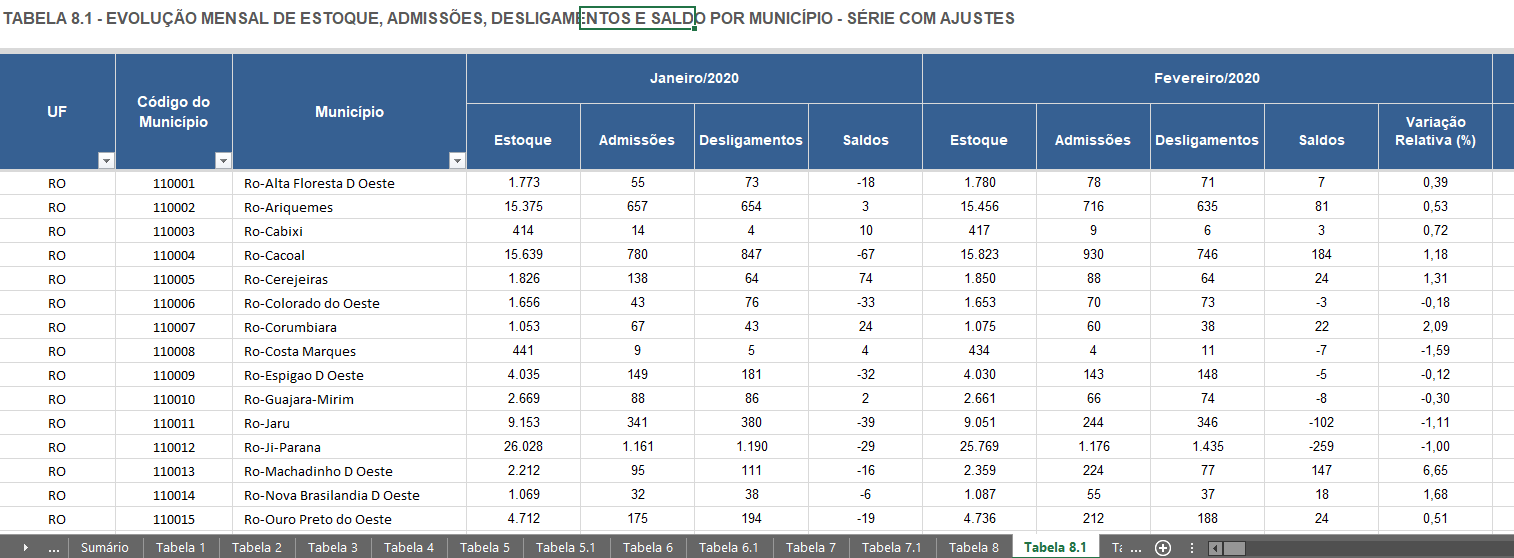

Ao tood, são **5585 linhas** (todos os municípios do Brasil), e **176 colunas** que contém as admissões, demissões, estoques, saldo (*admissão menos demissão*) e variação relativa para cada mês de Janeiro/2020 até o mês de extração (neste caso, Setembro/2022).

In [2]:
df.shape

(5585, 176)

Numa visão inicial do `DataFrame` carregado, temos uma visão dos principais problemas que o afetam: 

1. inúmeras linhas vazias [algumas destas corretamente];
2. células vazias que deveriam ser preenchidas [ex-células mescladas].

In [3]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,Unnamed: 172,Unnamed: 173,Unnamed: 174,Unnamed: 175
0,NaN,"TABELA 8.1 - EVOLUÇÃO MENSAL DE ESTOQUE, ADMIS...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,\nUF,\nCódigo do Município,\nMunicípio,Janeiro/2020,NaN,NaN,NaN,Fevereiro/2020,NaN,...,NaN,NaN,Acumulado no Ano (2022),NaN,NaN,NaN,Últimos 12 Meses** (Out/21 a Set/22)**,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,Estoque,Admissões,Desligamentos,Saldos,Estoque,Admissões,...,Saldos,Variação Relativa (%),Admissões,Desligamentos,Saldos,Variação Relativa (%),Admissões,Desligamentos,Saldos,Variação Relativa (%)


Em seguida, filtraremos apenas os 4 municípios do Litoral Norte.

Também criaremos condições especiais (`cond_5` e `cond_6`) para que possamos captar o cabeçalho e os meses.

In [4]:
cond_1 =df['Unnamed: 2']==355070 #São Sebastião
cond_2 =df['Unnamed: 2']==351050 #Caraguatatuba
cond_3 =df['Unnamed: 2']==352040 #Ilhabela
cond_4 =df['Unnamed: 2']==355540 #Ubatuba
cond_5 = df['Unnamed: 4']=='Janeiro/2020'
cond_6 = df['Unnamed: 4']=='Estoque'

In [5]:
df_ss = df[cond_1 | cond_2 | cond_3 | cond_4 | cond_5 | cond_6]

**Estado atual do Dataframe**

In [6]:
df_ss

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,Unnamed: 172,Unnamed: 173,Unnamed: 174,Unnamed: 175
3,NaN,\nUF,\nCódigo do Município,\nMunicípio,Janeiro/2020,NaN,NaN,NaN,Fevereiro/2020,NaN,...,NaN,NaN,Acumulado no Ano (2022),NaN,NaN,NaN,Últimos 12 Meses** (Out/21 a Set/22)**,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,Estoque,Admissões,Desligamentos,Saldos,Estoque,Admissões,...,Saldos,Variação Relativa (%),Admissões,Desligamentos,Saldos,Variação Relativa (%),Admissões,Desligamentos,Saldos,Variação Relativa (%)
3393,NaN,SP,351050,Sp-Caraguatatuba,21576,728,961,-233,21312,714,...,137,0.593151,9104,9041,63,0.271892,13236,11878,1358,6.207716
3505,NaN,SP,352040,Sp-Ilhabela,7005,260,303,-43,6923,271,...,54,0.705329,2895,2988,-93,-1.191849,4478,3995,483,6.683271
3839,NaN,SP,355070,Sp-Sao Sebastiao,15458,655,569,86,15635,686,...,266,1.42132,8435,6496,1939,11.377773,11300,8634,2666,16.340791
3894,NaN,SP,355540,Sp-Ubatuba,17878,752,783,-31,17629,595,...,267,1.480455,7165,7400,-235,-1.267735,10767,9688,1079,6.264878


## **1. Ajustes**

Preenchendo os valores horizontalmente: *horizontal forward fill (axis = 1*)

Cabe ressaltar que ainda assim, haverá valores vazios.

In [7]:
df_ss = df_ss.ffill(axis=1)

In [8]:
df_ss.head(3)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,Unnamed: 172,Unnamed: 173,Unnamed: 174,Unnamed: 175
3,NaN,\nUF,\nCódigo do Município,\nMunicípio,Janeiro/2020,Janeiro/2020,Janeiro/2020,Janeiro/2020,Fevereiro/2020,Fevereiro/2020,...,Setembro/2022,Setembro/2022,Acumulado no Ano (2022),Acumulado no Ano (2022),Acumulado no Ano (2022),Acumulado no Ano (2022),Últimos 12 Meses** (Out/21 a Set/22)**,Últimos 12 Meses** (Out/21 a Set/22)**,Últimos 12 Meses** (Out/21 a Set/22)**,Últimos 12 Meses** (Out/21 a Set/22)**
4,NaN,NaN,NaN,NaN,Estoque,Admissões,Desligamentos,Saldos,Estoque,Admissões,...,Saldos,Variação Relativa (%),Admissões,Desligamentos,Saldos,Variação Relativa (%),Admissões,Desligamentos,Saldos,Variação Relativa (%)
3393,NaN,SP,351050,Sp-Caraguatatuba,21576,728,961,-233,21312,714,...,137,0.593151,9104,9041,63,0.271892,13236,11878,1358,6.207716


**1.1 Criando o cabeçalho a partir da agregação entre primeira e segunda linha**

In [9]:
df_ss.columns = (df_ss.iloc[1] + '_' + df_ss.iloc[0])

In [10]:
df_ss.head(3)

,NaN,NaN,NaN,NaN,Estoque_Janeiro/2020,Admissões_Janeiro/2020,Desligamentos_Janeiro/2020,Saldos_Janeiro/2020,Estoque_Fevereiro/2020,Admissões_Fevereiro/2020,...,Saldos_Setembro/2022,Variação Relativa (%)_Setembro/2022,Admissões_Acumulado no Ano (2022),Desligamentos_Acumulado no Ano (2022),Saldos_Acumulado no Ano (2022),Variação Relativa (%)_Acumulado no Ano (2022),Admissões_Últimos 12 Meses** (Out/21 a Set/22)**,Desligamentos_Últimos 12 Meses** (Out/21 a Set/22)**,Saldos_Últimos 12 Meses** (Out/21 a Set/22)**,Variação Relativa (%)_Últimos 12 Meses** (Out/21 a Set/22)**
3,NaN,\nUF,\nCódigo do Município,\nMunicípio,Janeiro/2020,Janeiro/2020,Janeiro/2020,Janeiro/2020,Fevereiro/2020,Fevereiro/2020,...,Setembro/2022,Setembro/2022,Acumulado no Ano (2022),Acumulado no Ano (2022),Acumulado no Ano (2022),Acumulado no Ano (2022),Últimos 12 Meses** (Out/21 a Set/22)**,Últimos 12 Meses** (Out/21 a Set/22)**,Últimos 12 Meses** (Out/21 a Set/22)**,Últimos 12 Meses** (Out/21 a Set/22)**
4,NaN,NaN,NaN,NaN,Estoque,Admissões,Desligamentos,Saldos,Estoque,Admissões,...,Saldos,Variação Relativa (%),Admissões,Desligamentos,Saldos,Variação Relativa (%),Admissões,Desligamentos,Saldos,Variação Relativa (%)
3393,NaN,SP,351050,Sp-Caraguatatuba,21576,728,961,-233,21312,714,...,137,0.593151,9104,9041,63,0.271892,13236,11878,1358,6.207716


**1.2 Removendo os valores vazios**

Observação: o parâmetro `how = all` garante a remoção apenas das colunas que possuam valores vazios **em todos os seus registros**.




In [11]:
df_ss = df_ss.dropna(axis=1, how='all')

In [12]:
df_ss.head(3)

,NaN,NaN,NaN,Estoque_Janeiro/2020,Admissões_Janeiro/2020,Desligamentos_Janeiro/2020,Saldos_Janeiro/2020,Estoque_Fevereiro/2020,Admissões_Fevereiro/2020,Desligamentos_Fevereiro/2020,...,Saldos_Setembro/2022,Variação Relativa (%)_Setembro/2022,Admissões_Acumulado no Ano (2022),Desligamentos_Acumulado no Ano (2022),Saldos_Acumulado no Ano (2022),Variação Relativa (%)_Acumulado no Ano (2022),Admissões_Últimos 12 Meses** (Out/21 a Set/22)**,Desligamentos_Últimos 12 Meses** (Out/21 a Set/22)**,Saldos_Últimos 12 Meses** (Out/21 a Set/22)**,Variação Relativa (%)_Últimos 12 Meses** (Out/21 a Set/22)**
3,\nUF,\nCódigo do Município,\nMunicípio,Janeiro/2020,Janeiro/2020,Janeiro/2020,Janeiro/2020,Fevereiro/2020,Fevereiro/2020,Fevereiro/2020,...,Setembro/2022,Setembro/2022,Acumulado no Ano (2022),Acumulado no Ano (2022),Acumulado no Ano (2022),Acumulado no Ano (2022),Últimos 12 Meses** (Out/21 a Set/22)**,Últimos 12 Meses** (Out/21 a Set/22)**,Últimos 12 Meses** (Out/21 a Set/22)**,Últimos 12 Meses** (Out/21 a Set/22)**
4,NaN,NaN,NaN,Estoque,Admissões,Desligamentos,Saldos,Estoque,Admissões,Desligamentos,...,Saldos,Variação Relativa (%),Admissões,Desligamentos,Saldos,Variação Relativa (%),Admissões,Desligamentos,Saldos,Variação Relativa (%)
3393,SP,351050,Sp-Caraguatatuba,21576,728,961,-233,21312,714,978,...,137,0.593151,9104,9041,63,0.271892,13236,11878,1358,6.207716


**1.3 Em seguida, iremos utilizar os valores a partir da 2ª linha e 2ª coluna**

In [13]:
df_ss = df_ss.iloc[2:, 2:]

In [14]:
df_ss.head(3)

,NaN,Estoque_Janeiro/2020,Admissões_Janeiro/2020,Desligamentos_Janeiro/2020,Saldos_Janeiro/2020,Estoque_Fevereiro/2020,Admissões_Fevereiro/2020,Desligamentos_Fevereiro/2020,Saldos_Fevereiro/2020,Variação Relativa (%)_Fevereiro/2020,...,Saldos_Setembro/2022,Variação Relativa (%)_Setembro/2022,Admissões_Acumulado no Ano (2022),Desligamentos_Acumulado no Ano (2022),Saldos_Acumulado no Ano (2022),Variação Relativa (%)_Acumulado no Ano (2022),Admissões_Últimos 12 Meses** (Out/21 a Set/22)**,Desligamentos_Últimos 12 Meses** (Out/21 a Set/22)**,Saldos_Últimos 12 Meses** (Out/21 a Set/22)**,Variação Relativa (%)_Últimos 12 Meses** (Out/21 a Set/22)**
3393,Sp-Caraguatatuba,21576,728,961,-233,21312,714,978,-264,-1.223582,...,137,0.593151,9104,9041,63,0.271892,13236,11878,1358,6.207716
3505,Sp-Ilhabela,7005,260,303,-43,6923,271,353,-82,-1.170592,...,54,0.705329,2895,2988,-93,-1.191849,4478,3995,483,6.683271
3839,Sp-Sao Sebastiao,15458,655,569,86,15635,686,509,177,1.145038,...,266,1.42132,8435,6496,1939,11.377773,11300,8634,2666,16.340791


**1.4 Também renomearemos a primeira coluna a fim de se retirar o `NaN` como nome**

In [15]:
df_ss.rename(columns={df_ss.columns[0]: 'cidade'}, inplace=True)

**1.5 Unpivot de todas as colunas (transformar colunas em linhas) com exceção da coluna `cidade`.**

Os dados estão em formato de banco de dados colunar, ou seja, os registros estão armazenados nas colunas e não nas linhas. 

Os dados colunares não são ideais quando se é necessário visualizar múltiplos campos de cada linha. As bases de dados tradicionais de linhas tendem a ser melhores para *queries* que procuram apenas valores específicos do usuário. Adicionalmente, dados colunares tendem a demorar mais tempo para registrar novos dados (na maioria dos casos).

In [16]:
df_ss = pd.melt(df_ss, id_vars=['cidade'])

In [17]:
df_ss.head(3)

,cidade,variable,value
0,Sp-Caraguatatuba,Estoque_Janeiro/2020,21576
1,Sp-Ilhabela,Estoque_Janeiro/2020,7005
2,Sp-Sao Sebastiao,Estoque_Janeiro/2020,15458


**1.6 Desmembramento das colunas que estavam agregadas e junção no *DataFrame*** 

In [18]:
new_cols = df_ss['variable'].str.split('_', expand=True)

df_ss = pd.concat([df_ss, new_cols], axis=1)

In [19]:
df_ss.head(3)

,cidade,variable,value,0,1
0,Sp-Caraguatatuba,Estoque_Janeiro/2020,21576,Estoque,Janeiro/2020
1,Sp-Ilhabela,Estoque_Janeiro/2020,7005,Estoque,Janeiro/2020
2,Sp-Sao Sebastiao,Estoque_Janeiro/2020,15458,Estoque,Janeiro/2020


**1.7 Remoção da coluna `variable` e alteração dos nomes das colunas**

In [20]:
df_ss.drop(columns=['variable'], inplace=True)
df_ss.columns = ['cidade', 'qtde', 'tipo', 'data']

**1.8 Filtrando o *DataFrame* para remoção de valores não desejados**

In [21]:
df_ss = df_ss[df_ss["tipo"].str.contains("Vari") == False]
df_ss = df_ss[df_ss["data"].str.contains("Últimos") == False]
df_ss = df_ss[df_ss["data"].str.contains("Acumulado") == False]

**1.9 Criação das colunas `ano` e `mês`**

In [22]:
df_ss['ano'] = df_ss.data.str.extract('/(.*)')
df_ss['mês'] = df_ss['data'].str.split('/').str[0]

**1.10 Criação de colunas de datas baseadas nas colunas `ano` e `mês`.**

In [23]:
df_ss['data_completa'] = np.where(df_ss.mês=='Janeiro', '01/01/' + df_ss['ano'], 
                      np.where(df_ss.mês=='Fevereiro', '01/02/' + df_ss['ano'],
                      np.where(df_ss.mês=='Março', '01/03/' + df_ss['ano'],
                      np.where(df_ss.mês=='Abril', '01/04/' + df_ss['ano'],
                      np.where(df_ss.mês=='Maio', '01/05/' + df_ss['ano'],
                      np.where(df_ss.mês=='Junho', '01/06/' + df_ss['ano'],
                      np.where(df_ss.mês=='Julho', '01/07/' + df_ss['ano'],
                      np.where(df_ss.mês=='Agosto', '01/08/' + df_ss['ano'],
                      np.where(df_ss.mês=='Setembro', '01/09/' + df_ss['ano'],
                      np.where(df_ss.mês=='Outubro', '01/10/' + df_ss['ano'],
                      np.where(df_ss.mês=='Novembro', '01/11/' + df_ss['ano'],
                     np.where(df_ss.mês=='Dezembro', '01/12/' + df_ss['ano'],'a'))))))))))))

                     

In [24]:
df_ss.head(3)

,cidade,qtde,tipo,data,ano,mês,data_completa
0,Sp-Caraguatatuba,21576,Estoque,Janeiro/2020,2020,Janeiro,01/01/2020
1,Sp-Ilhabela,7005,Estoque,Janeiro/2020,2020,Janeiro,01/01/2020
2,Sp-Sao Sebastiao,15458,Estoque,Janeiro/2020,2020,Janeiro,01/01/2020


**1.11 Remoção do prefixo "Sp" na coluna `cidade`**

In [25]:
df_ss['cidade'] = df_ss['cidade'].str.replace('Sp-', '', regex=True)

In [26]:
df_ss.head(3)

,cidade,qtde,tipo,data,ano,mês,data_completa
0,Caraguatatuba,21576,Estoque,Janeiro/2020,2020,Janeiro,01/01/2020
1,Ilhabela,7005,Estoque,Janeiro/2020,2020,Janeiro,01/01/2020
2,Sao Sebastiao,15458,Estoque,Janeiro/2020,2020,Janeiro,01/01/2020


**1.12 Remoção de colunas não utilizadas**

In [27]:
df_ss = df_ss.drop(columns=['data', 'ano', 'mês'])

In [28]:
df_ss.head(3)

,cidade,qtde,tipo,data_completa
0,Caraguatatuba,21576,Estoque,01/01/2020
1,Ilhabela,7005,Estoque,01/01/2020
2,Sao Sebastiao,15458,Estoque,01/01/2020


**1.13 Ajuste da coluna `tipo`**

In [29]:
df_ss['tipo'] = np.where(df_ss["tipo"].str.contains("referência") == True, 'Estoque', df_ss['tipo'])

In [30]:
df_ss

,cidade,qtde,tipo,data_completa
0,Caraguatatuba,21576,Estoque,01/01/2020
1,Ilhabela,7005,Estoque,01/01/2020
2,Sao Sebastiao,15458,Estoque,01/01/2020
3,Ubatuba,17878,Estoque,01/01/2020
4,Caraguatatuba,728,Admissões,01/01/2020
...,...,...,...,...
647,Ubatuba,693,Desligamentos,01/09/2022
648,Caraguatatuba,137,Saldos,01/09/2022
649,Ilhabela,54,Saldos,01/09/2022
650,Sao Sebastiao,266,Saldos,01/09/2022


**1.14 Criação da Pivot Table**

In [31]:
df_ss['qtde'] = df_ss.qtde.astype('int')

In [32]:
df_final = pd.pivot_table(df_ss, values='qtde', index=['cidade','data_completa'], columns=['tipo']).reset_index()

In [33]:
df_final.head(3)

tipo,cidade,data_completa,Admissões,Desligamentos,Estoque,Saldos
0,Caraguatatuba,01/01/2020,728,961,21576,-233
1,Caraguatatuba,01/01/2021,782,1091,21261,-309
2,Caraguatatuba,01/01/2022,960,1137,22994,-177


**1.15 Criação de *linhas* contendo o nome de cidade Litoral Norte**

Para realizar tal operação, nós iremos somar as admissões, desligamentos, estoques e saldo das cidades de Caraguatatuba, Ilhabela e Ubatuba.

Iremos realizar um agrupamento inicial, e, a partir deste, juntaremos esse novo *DataFrame* que será criado (df_litoral_norte) com o nosso *DataFrame* anterior, do *passo 1.15*.

In [34]:
cond_a = df_final.cidade=='Caraguatatuba'
cond_b = df_final.cidade=='Ilhabela'
cond_c = df_final.cidade=='Ubatuba'

df_litoral_norte = df_final[cond_a | cond_b | cond_c].groupby(['data_completa'])[['Admissões', 'Desligamentos', 'Estoque', 'Saldos' ]].sum()
df_litoral_norte.reset_index(inplace=True)
df_litoral_norte['cidade'] = 'Litoral Norte'
df_litoral_norte

tipo,data_completa,Admissões,Desligamentos,Estoque,Saldos,cidade
0,01/01/2020,1740,2047,46459,-307,Litoral Norte
1,01/01/2021,1994,2414,45729,-420,Litoral Norte
2,01/01/2022,2096,2485,49122,-389,Litoral Norte
3,01/02/2020,1580,2175,45864,-595,Litoral Norte
4,01/02/2021,2016,2031,45714,-15,Litoral Norte
5,01/02/2022,2230,2494,48858,-264,Litoral Norte
6,01/03/2020,1616,2861,44619,-1245,Litoral Norte
7,01/03/2021,1844,2328,45230,-484,Litoral Norte
8,01/03/2022,2038,2463,48433,-425,Litoral Norte
9,01/04/2020,565,2324,42860,-1759,Litoral Norte


## **2. Criação do DataFrame final com o ajuste**

In [41]:
df_ajustado = pd.concat([df_final, df_litoral_norte], axis=0)
df_ajustado['data_completa'] = pd.to_datetime(df_ajustado.data_completa, dayfirst=True)
df_ajustado.to_excel('df_ajustado.xlsx')

In [36]:
df_ajustado

tipo,cidade,data_completa,Admissões,Desligamentos,Estoque,Saldos
0,Caraguatatuba,01/01/2020,728,961,21576,-233
1,Caraguatatuba,01/01/2021,782,1091,21261,-309
2,Caraguatatuba,01/01/2022,960,1137,22994,-177
3,Caraguatatuba,01/02/2020,714,978,21312,-264
4,Caraguatatuba,01/02/2021,825,932,21154,-107
...,...,...,...,...,...,...
28,Litoral Norte,01/10/2021,2935,1769,47492,1166
29,Litoral Norte,01/11/2020,2858,1419,44865,1439
30,Litoral Norte,01/11/2021,3103,1950,48645,1153
31,Litoral Norte,01/12/2020,3185,1901,46149,1284
